In [1]:
#Used for math opperations
import numpy as np

#Used for plotting data
import matplotlib.pyplot as plt
%matplotlib inline

#Used to read outside files
import pandas as pd

### Get the Names of CSV files

In [2]:
System = input("Input Operating System; W for Windows, M for Mac or Linux: ")

Input Operating System; W for Windows, M for Mac or Linux: w


In [3]:
if System == 'W' or 'w':
    Address = r'..\\..\\Data\\Heat Map\\Circle\\'
        
if System == 'M' or 'm':
    Address = r'..//..//Data//Heat Map//Circle//'

In [4]:
# A list of both n and s values
# Must be input as strings and include all sig-figs
# Maximum of nine s values

N = ['100','1000','5000','10000']
S = ['0.275','0.5','1.0']

In [5]:
def filenumber(n):
    if System == 'W' or 'w':
        number = Address + '\\' + n
    elif System == 'M' or 'm':
        number = Address + '//' + n
    return number

def filename(n ,s):
    name = Address + 'heat_map_s' + s + '_n_' + n + '_numTrials_1.csv' 
    return name

In [6]:
# This creates a list of all data addresses the user specified
Files = []

for n in range(len(N)):
    for s in range(len(S)):
        Files.append(filename((N[n]),S[s]))

### Get CSV Data

In [7]:
# Takes a csv file and reads all the data
def getdata(file):
    colnames = ['data']
    File_Data = pd.read_csv(file, names=colnames)
    
    return list(File_Data['data'])

In [8]:
Trial_Data = []

for x in range(len(Files)):
    Trial_Data.append(getdata(Files[x]))
    
for y in range(len(Trial_Data)):
    Trial_Data[y].append(0)

### Getting Ready to Graph

In [9]:
# Creates a list of theta values and a list of zero values for graphing

def getTheta(n):
    theta = [(2*np.pi*k)/n for k in range(0, n+1)]
    return theta

def getLine(n):
    line = [0 for k in range(n+1)]
    return line

In [10]:
def graphCircle(n):
    index = N.index(str(n))
    
    fig = plt.figure(figsize = (30,30))
    # fig.suptitle("DFGFs on the Circle with N = {}".format(n), fontsize=30)
    
    for i in range(len(S)):
        ax = plt.subplot(3, 3, i+1, projection='3d')
        
        ax.plot3D(np.cos(getTheta(int(N[index]))), np.sin(getTheta(int(N[index]))), Trial_Data[(index*len(S))+i], alpha = .5, c = 'maroon')
        ax.plot3D(np.cos(getTheta(int(N[index]))), np.sin(getTheta(int(N[index]))), getLine(int(N[index])), alpha = .75, c = 'black')
        ax.scatter3D(np.cos(getTheta(int(N[index]))), np.sin(getTheta(int(N[index]))), getLine(int(N[index])), cmap = 'coolwarm', c = Trial_Data[(index*len(S))+i], alpha = 1, s = 100)
        ax.set_title('s = {}'.format(S[i]), fontsize=30)

## Graphs

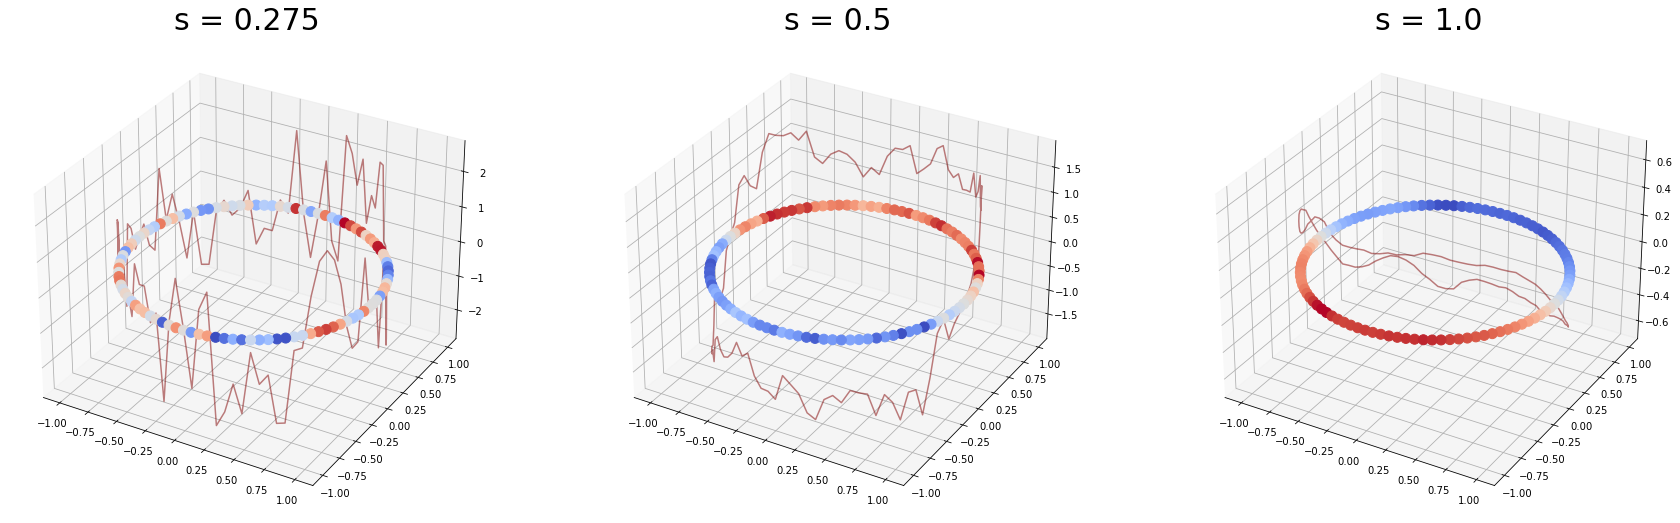

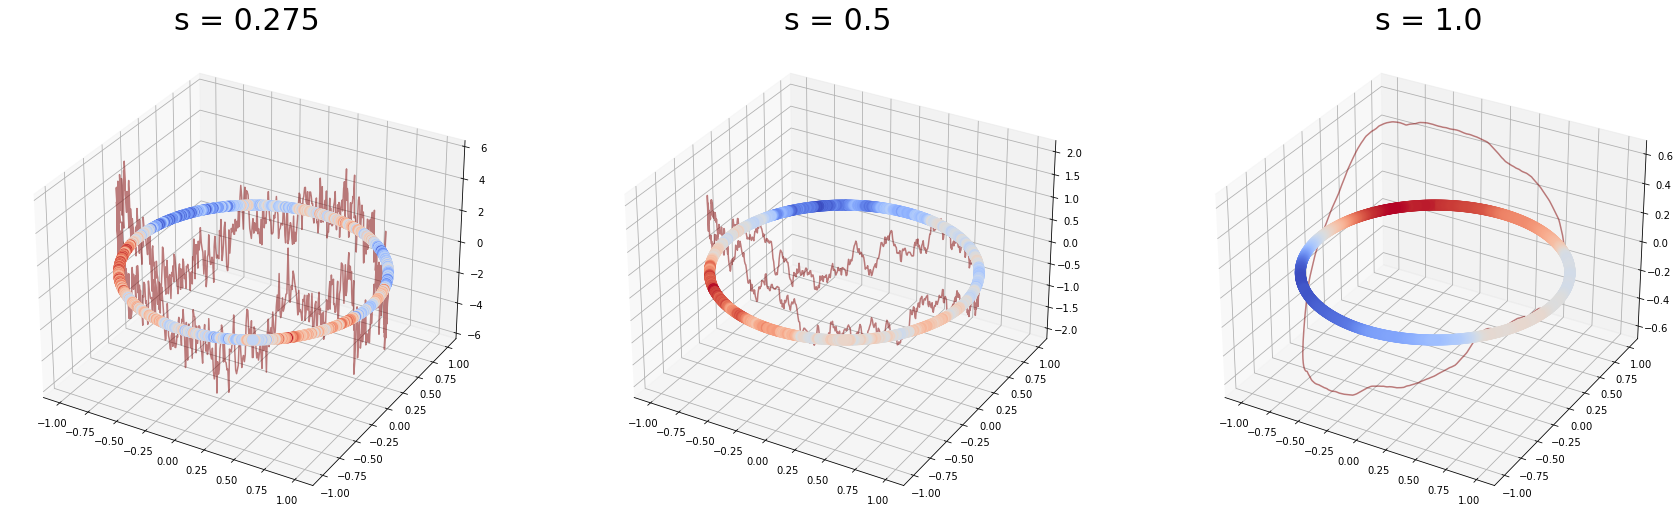

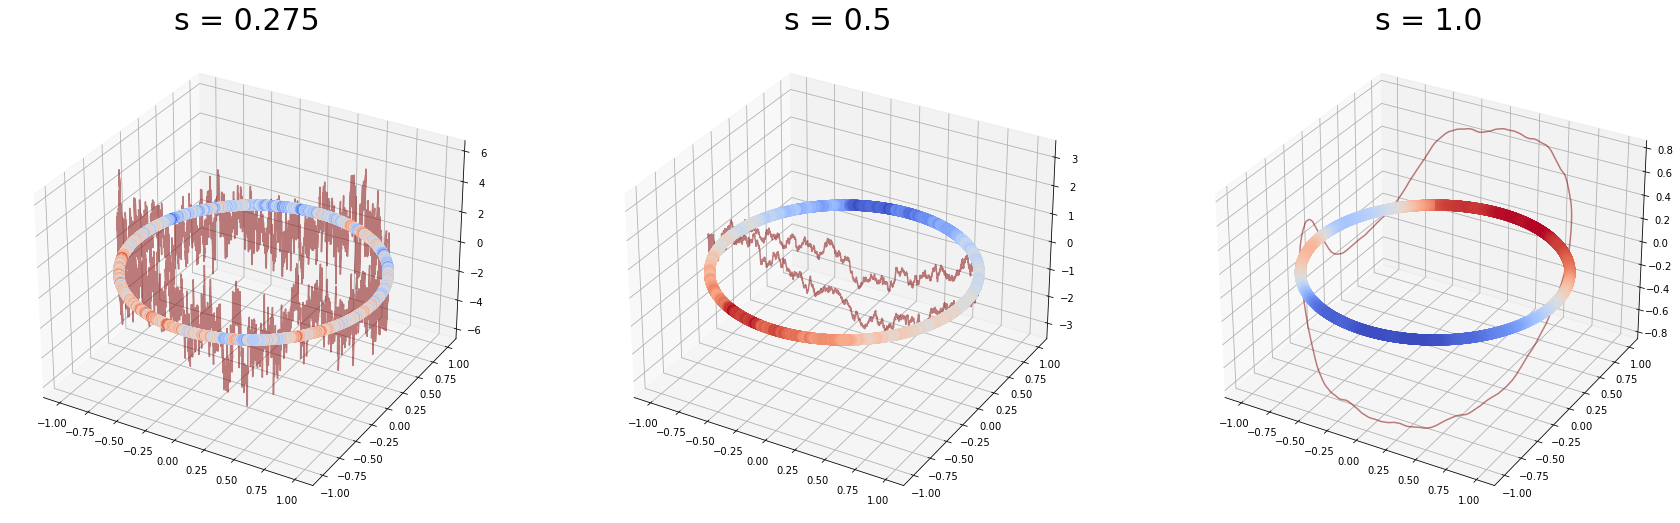

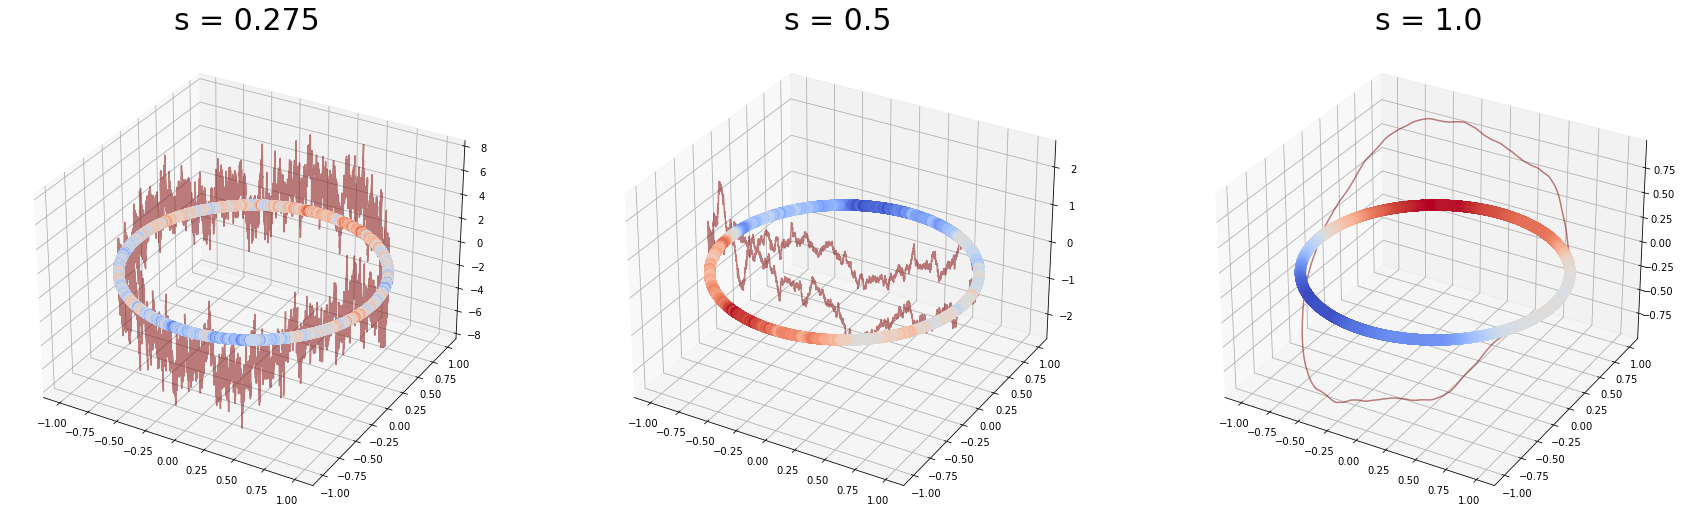

In [11]:
for n in range(len(N)):
    graphCircle(int(N[n]))